<a href="https://colab.research.google.com/github/Calebmonroe/DS2/blob/main/HW4__ipynb_Caleb_Monroe_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #4 - Logistic Regression and Visualization
This assignment will follow our discussions in class about univariate and multivariate logistic regression, probability target assignment, and different visualizations.  It will focus on the same data set as the previous assignment, which you should be familiar with by now.

## Package Imports
(I realize we keep importing packages that we don't use, which is not best practice, however my plan is to keep a running list of all the packages that we have used so that we have them all in one place at the end of the semester.)

##Imports and Function Definitions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sklearn.metrics as metrics
import seaborn as sns
import cv2
sns.axes_style("whitegrid")
sns.set_context("paper")
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import add_dummy_feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



np.random.seed(42)

In [2]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)

In [3]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
#    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_absolute_error: ', round(mean_absolute_error,4))
#    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [4]:
def model_acc(res):  # format of res should be predictions in column0, and actual in column1
    bad=0; good=0
    pred=res['pred']
    act= res['actual']
#    print(pred, act)
# need to keep track of good and bad predictions
    # print(len(pred))
    for index, row in res.iterrows():
        if row['actual'] == row['pred']:
            good += 1

    print("Your model made ", good/len(pred)*100, " percent correct predictions\n")
    return


In [5]:
def model_acc_bad(res):  # format of res should be predictions in column0, and actual in column1
    bad=0; good=0
    pred=res['pred']
    act= res['actual']

# need to keep track of good and bad predictions
    bd = len(res['pred'])
    bdata=np.zeros((bd,2))
    for i in range(len(pred)): # loop over all items
      if pred[i] >=0.5:  # if prob is >50%
        if act[i] == True: # and if flower is virginica
          good=good+1  # keep track of success
        else:
          bad=bad+1
          # keep track of failure number and location
          bdata[i,0]=X_train[i][0] # should be the feature values from training data
          bdata[i,1]=X_train[i][1] # should be the feature values from training data

      elif pred[i] <0.5:
        if act[i] == False: # correctly identifying false is also success
          good=good+1
        else:
          bad=bad+1
#          bdata[i,j]=X_train[i] # should be the feature values from training data
          bdata[i,0]=X_train[i][0] # should be the feature values from training data
          bdata[i,1]=X_train[i][1] # should be the feature values from training data

    print("Your model made ", good/len(pred)*100, "percent correct predictions\n")
# return the feature values that led to bad predictions
    return bdata
#    return

In [6]:
#X_train[0]

In [7]:
#model_acc2(res_df,type) # 0 for setosa, 1 for versi, 2 for virg

# need condition for each type
def model_acc2(res,type):

    if (type==0):
      m1 = res['pred']>=0.5
      m2 = res['actual']==1
    elif (type==1):
      m1 = res['pred']>=0.5
      m2 = res['actual']==1
    elif (type==2):
      m1 = res['pred']>=0.5
      m2 = res['actual']==1


#    m1 = res['pred']>=0.5
#    m2 = res['actual']==1
    sum12=sum(m1==m2)
    pct=sum12/len(res)*100
    print("Your model made ", pct, "percent correct predictions\n")
    return

In [8]:
def model_parm_std_err(xdata, ydata, model): # assumes xtest and ytest are not dfs
# this function was written for univariate regression,
# not yet tested for multivariate

# if you just want to check whether this algorithm works, use statsmodels

# using this with scaled data (both x and y) gives the same slope
# but a different intercept

    df_xt = pd.DataFrame(xdata)
    df_yt = pd.DataFrame(ydata)

    modelf = model

    N = len(df_xt)
    p = len(df_xt.columns) + 1  # plus one because LinearRegression adds an intercept term

    X_with_intercept = np.empty(shape=(N, p), dtype=float)
    X_with_intercept[:, 0] = 1
    X_with_intercept[:, 1:p] = xdata


    beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ ydata

    #print(beta_hat)

    modelf.fit(xdata,ydata)

    slope = modelf.coef_[0][0]
    intercept = modelf.intercept_[0]

    y_hat = modelf.predict(df_xt)
    residuals = ydata - y_hat

    residual_sum_of_squares = residuals.T @ residuals
    sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
    var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat


# var_beta hat output errors on intercept first, then slope1, slope2, etc.
    for p_ in range(p):
      standard_error = var_beta_hat[p_, p_] ** 0.5
#      print(var_beta_hat.shape)
#      print(f"SE(beta_hat[{p_}]): {standard_error}")

    print ("slope:\t", slope, "+/-", var_beta_hat[1,1]**0.5, "\nintercept:\t", intercept, "+/-", var_beta_hat[0,0]**0.5)


In [9]:
def lasso_model_parm_std_err(xdata, ydata, model): # assumes xtest and ytest are not dfs
# this function was written for univariate regression for the lasso model which
# is formatted differently

# if you just want to check whether this algorithm works, use statsmodels

# using this with scaled data (both x and y) gives the same slope
# but a different intercept

    df_xt = pd.DataFrame(xdata)
    df_yt = pd.DataFrame(ydata)

    modelf = model

    N = len(df_xt)
    p = len(df_xt.columns) + 1  # plus one because LinearRegression adds an intercept term

    X_with_intercept = np.empty(shape=(N, p), dtype=float)
    X_with_intercept[:, 0] = 1
    X_with_intercept[:, 1:p] = xdata


    beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ ydata

    #print(beta_hat)

    modelf.fit(xdata,ydata)

# format for lasso
    slope = modelf.coef_[0]
    intercept = modelf.intercept_[0]


    y_hat = modelf.predict(df_xt)
    residuals = ydata - y_hat

    residual_sum_of_squares = residuals.T @ residuals
    sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
    var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat


# var_beta hat output errors on intercept first, then slope1, slope2, etc.
    for p_ in range(p):
      standard_error = var_beta_hat[p_, p_] ** 0.5
#      print(var_beta_hat.shape)
#      print(f"SE(beta_hat[{p_}]): {standard_error}")

    print ("slope:\t", slope, "+/-", var_beta_hat[1,1]**0.5, "\nintercept:\t", intercept, "+/-", var_beta_hat[0,0]**0.5)

In [10]:
def mv_model_parm_std_err(xdata, ydata, model): # assumes xdata and ydata are not dfs
# this function was written for multivariate regression for the lasso model which
# is formatted differently

    df_xt = pd.DataFrame(xdata)
    df_yt = pd.DataFrame(ydata)

    modelf = model

    N = len(df_xt)
    p = len(df_xt.columns) + 1  # plus one because LinearRegression adds an intercept term

    X_with_intercept = np.empty(shape=(N, p), dtype=float)
    X_with_intercept[:, 0] = 1
    X_with_intercept[:, 1:p] = xdata

    beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ ydata

    #print(beta_hat)

    modelf.fit(xdata,ydata)

# format for lasso
    slope = []
    for i in range(len(modelf.coef_)):
      slope.append(modelf.coef_[i])

#    slope = modelf.coef_[0]
    intercept = modelf.intercept_[0]


    y_hat = modelf.predict(df_xt)
    residuals = ydata - y_hat

    residual_sum_of_squares = residuals.T @ residuals
    sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
    var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat


# var_beta hat output errors on intercept first, then slope1, slope2, etc.
    for p_ in range(p):
      standard_error = var_beta_hat[p_, p_] ** 0.5
#      print(var_beta_hat.shape)
#      print(f"SE(beta_hat[{p_}]): {standard_error}")

    for p_ in range(p):
      std_err = var_beta_hat[p_,p_]**0.5
      if(p_==0):
        print("intercept:\t",intercept,"+/-",std_err,"\n")
        continue
#          print("slope",p_,":\t",slope[p_],"+/-",std_err,"\n")
#      else:
      print("slope",p_,":\t",slope[p_-1],"+/-",std_err,"\n")

#    print ("slope:\t", slope, "+/-", var_beta_hat[1,1]**0.5, "\nintercept:\t", intercept, "+/-", var_beta_hat[0,0]**0.5)

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Setting up the data

## FEV_Lung Data and Visualizations
#### DATA DESCRIPTION:
The data are from n = 654 children between 3 and 19 years old. The data features include forced expiratory volume (**FEV**, a measure of how much air somebody can forcibly exhale from their lungs), subject **Age** (years), subject height (inches), sex (f/m), and whether they smoke (n/y).  Data source: The data here are a part of dataset given in
* Kahn, Michael (2005). "An Exhalent Problem for Teaching Statistics", The Journal of Statistical Education, 13(2) [link](http://jse.amstat.org/v13n2/datasets.kahn.html)

Using this dataset, the task is to predict the FEV

* **Age**: Child's age [years]
* **fev**: Lung Volume [liters]
* **ht**: Child's height [in]
* **sex**: (f/m)
* **smoke**: (n/y)


In [12]:
web_path = '' #if downloaded data to the current folder
web_path = 'http://public.gettysburg.edu/~rjohnson/ds325/' #if using data over web
df = pd.read_csv(web_path+'fev_lung.csv')
df.head()

,age,fev,ht,sex,smoke
0,9,1.708,57.0,0,0
1,8,1.724,67.5,0,0
2,7,1.720,54.5,0,0
3,9,1.558,53.0,1,0
4,9,1.895,57.0,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     654 non-null    int64  
 1   fev     654 non-null    float64
 2   ht      654 non-null    float64
 3   sex     654 non-null    int64  
 4   smoke   654 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 25.7 KB


In [14]:
df.describe()

,age,fev,ht,sex,smoke
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,9.931193,2.636780,61.143578,0.513761,0.099388
std,2.953935,0.867059,5.703513,0.500193,0.299412
min,3.000000,0.791000,46.000000,0.000000,0.000000
25%,8.000000,1.981000,57.000000,0.000000,0.000000
50%,10.000000,2.547500,61.500000,1.000000,0.000000
75%,12.000000,3.118500,65.500000,1.000000,0.000000
max,19.000000,5.793000,74.000000,1.000000,1.000000


The data for sex and smoke are both binary

0 for female, 1 for male

0 for nonsmoker, 1 for smoker

## Prepare the data (train/test split)

In [15]:
from sklearn.model_selection import train_test_split

#setting random state should ensure same train/test set each time
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
# just checking to be sure overall statistical distributions are similar
train_set.describe(), test_set.describe()

(              age         fev          ht         sex       smoke
 count  523.000000  523.000000  523.000000  523.000000  523.000000
 mean     9.938815    2.620193   61.170937    0.504780    0.099426
 std      2.853391    0.856641    5.678247    0.500456    0.299520
 min      3.000000    0.791000   46.500000    0.000000    0.000000
 25%      8.000000    1.989000   57.500000    0.000000    0.000000
 50%     10.000000    2.504000   61.500000    1.000000    0.000000
 75%     12.000000    3.096000   65.000000    1.000000    0.000000
 max     19.000000    5.638000   74.000000    1.000000    1.000000,
               age        fev          ht         sex       smoke
 count  131.000000  131.00000  131.000000  131.000000  131.000000
 mean     9.900763    2.70300   61.034351    0.549618    0.099237
 std      3.337099    0.90783    5.824085    0.499442    0.300127
 min      3.000000    1.07200   46.000000    0.000000    0.000000
 25%      8.000000    1.95750   57.000000    0.000000    0.000000


In [17]:
# now, split up the training data by feature

#convert into a numpy array;
#extra brackets are for sklearn because it wants a 2D array
xsk1_train = np.array(train_set[['age']])
xsk2_train = np.array(train_set[['ht']])
xsk3_train = np.array(train_set[['sex']])
xsk4_train = np.array(train_set[['smoke']])
ysk_train = np.array(train_set[['fev']])

# and do the same with your test data
xsk1_test = np.array(test_set[['age']])
xsk2_test = np.array(test_set[['ht']])
xsk3_test = np.array(test_set[['sex']])
xsk4_test = np.array(test_set[['smoke']])
ysk_test = np.array(test_set[['fev']])

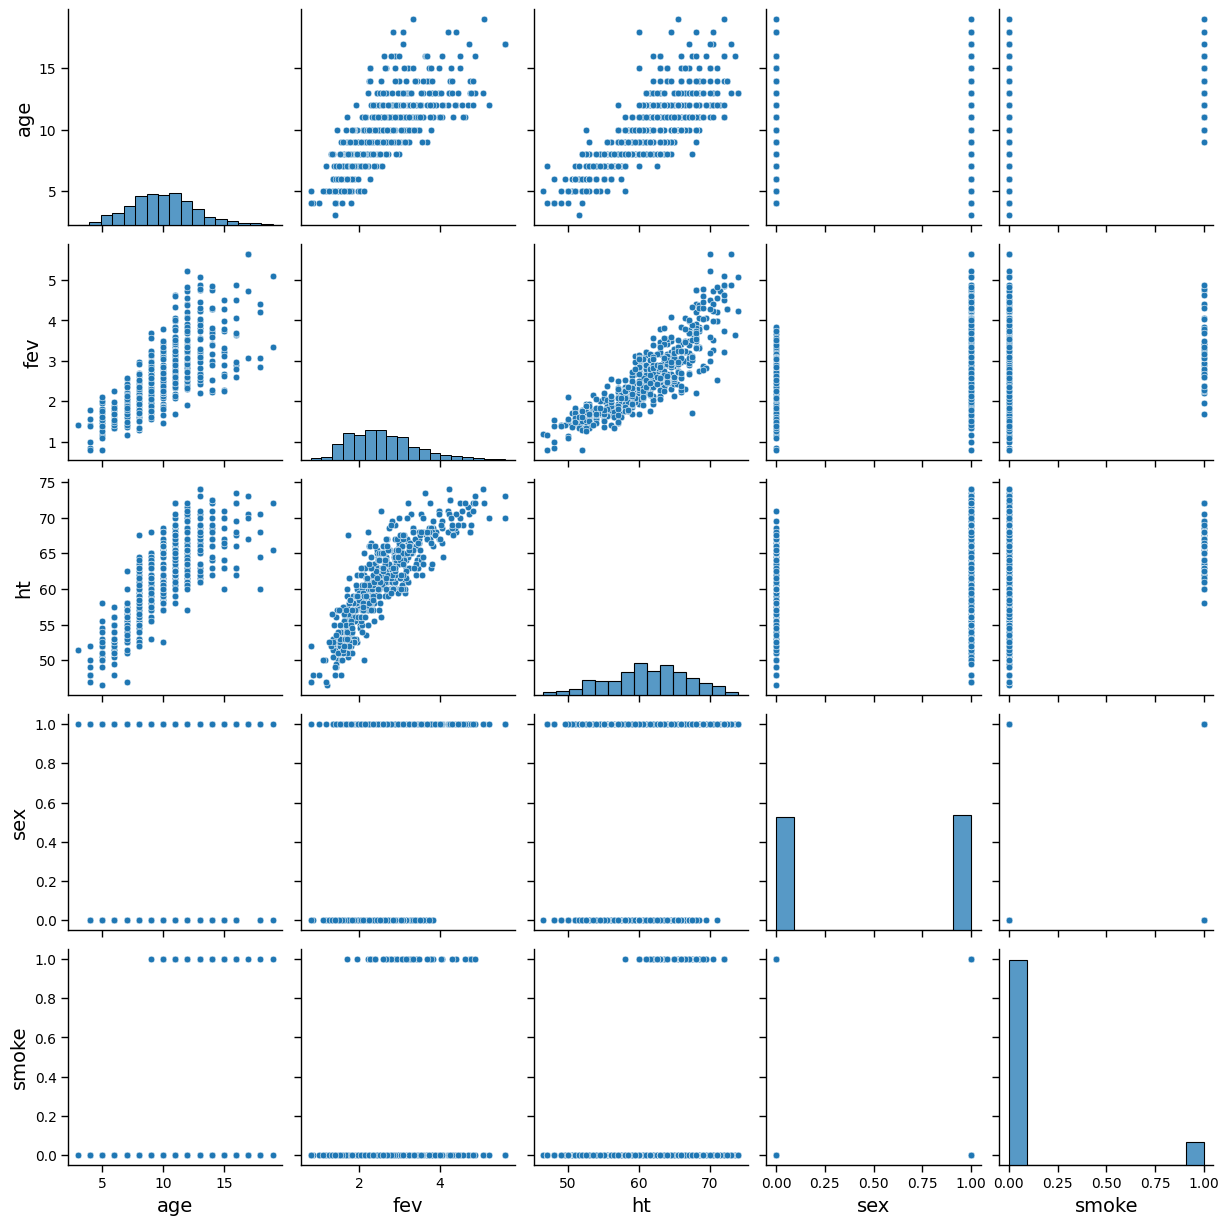

In [18]:
# take a look at any obvious linear correlations
sns.pairplot(train_set)

<Axes: >

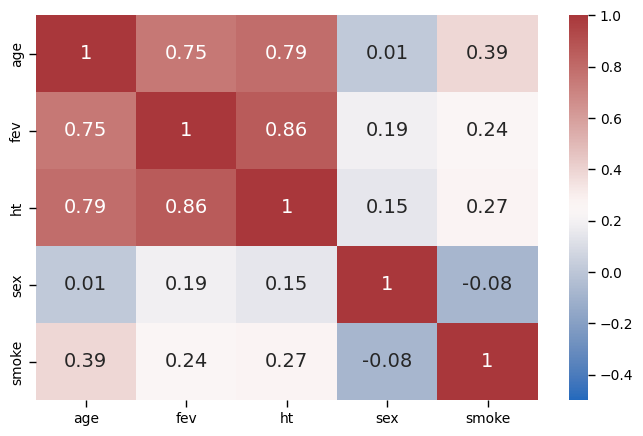

In [19]:
correlation_matrix = train_set.corr().round(2)
fig, ax = plt.subplots(figsize=(8.1, 5))
sns.heatmap(data=correlation_matrix, annot=True,vmin=-0.5,vmax=1,cmap='vlag')# annot = True to print the values inside the square

# Exercise 1 - Data Visualization
Using the FEV lung data, and the method shown in class08, produce kernel density plots of:
* fev vs. age (colored by sex)
* fev vs. ht (colored by sex)
* ht vs. age (colored by sex)
* fev vs. age (colored by smoking status)
* fev vs. ht (colored by smoking status)
* ht vs. age (colored by smoking status)

Discuss the resulting distribution of data in the plots you've made, and describe any visible relationships between the plotted quantities.  

In [20]:
female = df.query("sex == 0")#Assigning numerical values to female and male
male = df.query("sex==1")
yes_smoke = df.query("smoke == 1")#Assigning numerical values to smokers and non-smokers
no_smoke = df.query("smoke == 0")

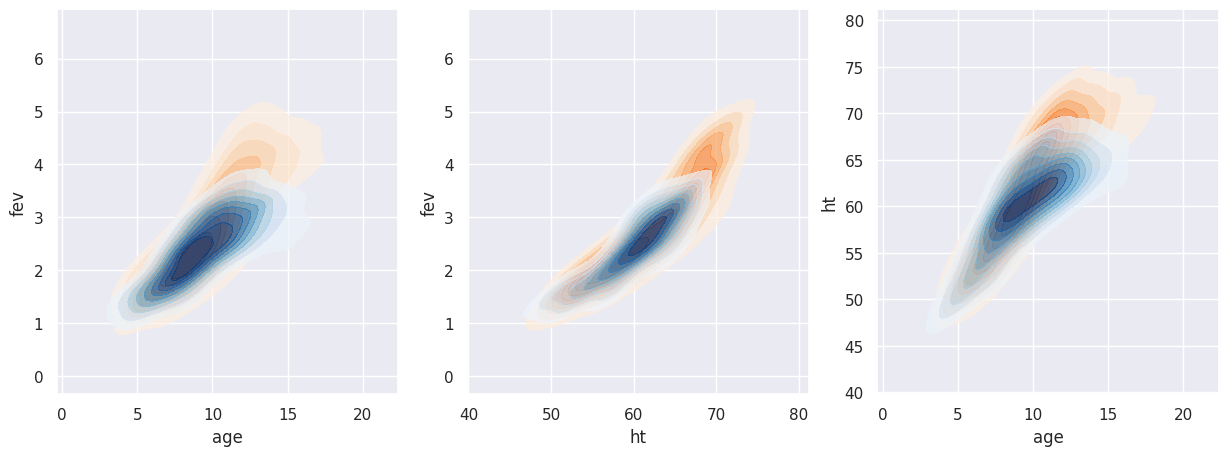

In [21]:
sns.set(style='darkgrid') #setting the grid style

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) #creating subplots for visual purposes

ax = sns.kdeplot(x=male.age, y=male.fev, cmap="Oranges", fill=True, thresh=0.1,alpha=0.7, ax=axes[0]) #displaying subplot 1
ax = sns.kdeplot(x=female.age, y=female.fev, cmap="Blues", fill=True, thresh=0.1,alpha=0.7, ax=axes[0])

ax1 = sns.kdeplot(x=male.ht, y=male.fev, cmap="Oranges", fill=True, thresh=0.1,alpha=0.7, ax=axes[1]) #displaying subplot 2
ax1 = sns.kdeplot(x=female.ht, y=female.fev, cmap="Blues", fill=True, thresh=0.1,alpha=0.7, ax=axes[1])

ax2 = sns.kdeplot(x=male.age, y=male.ht, cmap="Oranges", fill=True, thresh=0.1,alpha=0.7, ax=axes[2]) #displaying subplot 3
ax2 = sns.kdeplot(x=female.age, y=female.ht, cmap="Blues", fill=True, thresh=0.1,alpha=0.7, ax=axes[2])


# Discussion of above plots:
I attempted mastery level question 1 to make the plots as visually appealing as possible. As a result, I believe that using the contrasting colors of orange and blue provide for a clear visualization regarding the differences between males and females in these plots. Additionally, I believe that setting the "thresh" values and "alpha" values to .1 and .7 respectively provides the reader with a clear opportunity to understand the relationship between both variables.

The plots above show several relationships between the variables assigned and the use of sex as the coloring. In the first plot, it appears that males typically possess higher fev levels than females, after reaching a certain age. For example, individuals who are very young (regardless of sex) have a relatively low fev; however, once males pass the age of around 10 years old, the plot appears to show that these males likely possess higher fev levels than females who are the same age. The second plot shows a similar relationship to the first, except age is replaced by height. It appears that males and females have similar fev's and heights until males reach a height around 65 inches. After this point, males seem to have higher fev levels. Plot 3 shows that males and females typically have similar heights until just before age 10. After this age, males tend to be taller than females.

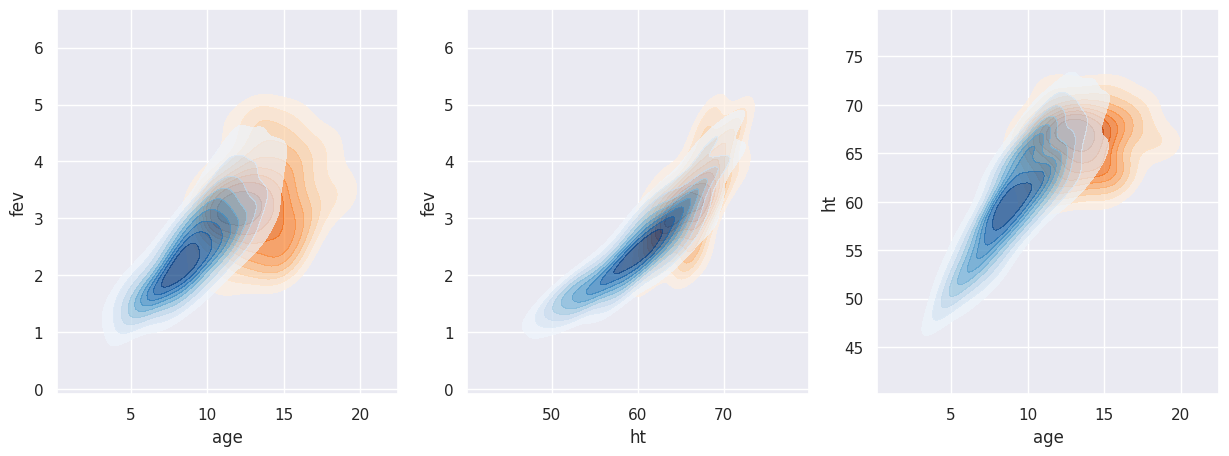

In [22]:
sns.set(style='darkgrid') #setting the grid style

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) #creating subplots for visual purposes

ax = sns.kdeplot(x=yes_smoke.age, y=yes_smoke.fev, cmap="Oranges", fill=True, thresh=0.1,alpha=0.7, ax=axes[0]) #displaying subplot 1
ax = sns.kdeplot(x=no_smoke.age, y=no_smoke.fev, cmap="Blues", fill=True, thresh=0.1,alpha=0.7, ax=axes[0])

ax1 = sns.kdeplot(x=yes_smoke.ht, y=yes_smoke.fev, cmap="Oranges", fill=True, thresh=0.1,alpha=0.7, ax=axes[1]) #displaying subplot 2
ax1 = sns.kdeplot(x=no_smoke.ht, y=no_smoke.fev, cmap="Blues", fill=True, thresh=0.1,alpha=0.7, ax=axes[1])

ax2 = sns.kdeplot(x=yes_smoke.age, y=yes_smoke.ht, cmap="Oranges", fill=True, thresh=0.1,alpha=0.7, ax=axes[2]) #displaying subplot 3
ax2 = sns.kdeplot(x=no_smoke.age, y=no_smoke.ht, cmap="Blues", fill=True, thresh=0.1,alpha=0.7, ax=axes[2])

# Discussion of above plots:
The above 3 plots are distinguished by whether an individual is a smoker (orange) or not (blue). In the first plot, smokers tend to be older in age than non-smokers. However, the fev values of both smokers and non-smokers are not drastically different. This could imply that the fev values of smokers does not increase even when the individuals get older. However, the most outward boundary of the non-smokers are not quite as large as most outward boundary of smokers, so there could be instances where smokers in the data set do actually have higher fev's. This particular plot shows that age could be a significant predictor for whether an individual is a smoker or not. In the second plot, there is a relatively high amount of overlap between smokers and non-smokers. This shows that height probably won't be an effective predictor or whether someone is a smoker or non-smoker. Heights do seem to vary in smokers more than non-smokers. The third plot also incorporates age which shows that higher ages are more likely to be smokers, which is similar to the first plot. Height increases gradually over time for non smokers, but the smoking population in this data set seems to start around age 10 and the height remains relatively steady for the smoking individuals.

#Mastery Level Question 1 - Aesthetics matter

Extending on your efforts in exercise 1, you should do your best to make your plots look as visually appealing as possible.  Your goal in each of these visualizations should be to illustrate the distribution of points as clearly as possible, using your choice color map (color scale), and using a combination of "thresh" and "alpha" parameters to highlight any differences as a function of either sex or smoking status

Comment on any relationships are apparent in each density plot, especially those relationships that are not as apparent from the scatter plot.  

#Exercise 2 - Logistic Regression (univariate)

Using the method outlined in class, you are to perform a **logistic regression on the FEV Lung data** set.  The purpose of this regression is to **determine the probability that a subject in the study is, or is not, a smoker, based on a single data feature.**   Your threshold for deciding whether someone is or is not a smoker should be a probability of 50%.

In order to do this, you will need to train a separate logistic regressor for each available feature (**fev, age, ht, and sex**).  

For each regressor, be sure to:  
* use **stratified sampling on the 'age' feature** in your train/test split
* **train** your logistic regression model
* **discuss** your models' **accuracy** when applied to the training set; how did it perform?
* **discuss** your models' **accuracy** when applied to the test set; how did it perform?
* looking at all of your models, **state which is the best univariate model for predicting smoking status and why**

In [23]:
X = df[['fev','age', 'ht', 'sex']]#Setting up data for train/test split
y = df['smoke']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df['age'], test_size=0.2, random_state=42)
#Executing train/test split and using stratified sampling on the 'age' feature

In [24]:
#Testing Set
from sklearn.metrics import precision_score, recall_score #importing precision, recall
from sklearn.metrics import f1_score #importing f1 score
for feature in X_train.columns: #Setting up logistic regression model and specifying that I want to use fev as X
    model = LogisticRegression()
    model.fit(X_train[['fev']], y_train) #fitting model
    predictions = model.predict(X_test[['fev']]) #predicting using X_test fev
res = pd.DataFrame({'pred': predictions, 'actual': y_test}) #defining res model
model_acc(res) #running res through model_acc
precision = precision_score(y_test, predictions)#printing accuracy, precision, recall, and f1 scores
print("Your model has a precision score of", precision)
recall = recall_score(y_test, predictions)
print("Your model has a recall score of", recall)
f1 = f1_score(y_test, predictions)
print("Your model has a f1 score of", f1)

Your model made  90.83969465648855  percent correct predictions

Your model has a precision score of 0.0
Your model has a recall score of 0.0
Your model has a f1 score of 0.0


In [25]:
#Training Set
for feature in X_train.columns:#Setting up logistic regression model and specifying that I want to use fev as X
    model = LogisticRegression()
    model.fit(X_train[['fev']], y_train)#fitting model
    predictions = model.predict(X_train[['fev']])#predicting using X_train fev
res = pd.DataFrame({'pred': predictions, 'actual': y_train})#defining res model
model_acc(res)#running res through model_acc
precision = precision_score(y_train, predictions)#printing accuracy, precision, recall, and f1 scores
print("Your model has a precision score of", precision)
recall = recall_score(y_train, predictions)
print("Your model has a recall score of", recall)
f1 = f1_score(y_train, predictions)
print("Your model has a f1 score of", f1)

Your model made  89.2925430210325  percent correct predictions

Your model has a precision score of 0.0
Your model has a recall score of 0.0
Your model has a f1 score of 0.0


# Discussion of train and test fev models above
The testing model above resulted in 90.84% of predictions being correct whereas the training model resulted in 89.29% of predictions being correct.  This means that both models performed relatively well, but the test set outperformed the training set by a slim margin of about a percent and a half. The precision, recall, and f1 scores of these models appear to be 0. I'm not entirely sure why this is the case as I tried changing a few things around in my code but was unsuccessful in obtaining values for these metrics.  

In [26]:
#Testing Set
for feature in X_train.columns:#Setting up logistic regression model and specifying that I want to use age as X
    model = LogisticRegression()
    model.fit(X_train[['age']], y_train)#fitting model
    predictions = model.predict(X_test[['age']])#predicting using X_test age
res = pd.DataFrame({'pred': predictions, 'actual': y_test})#defining res model
model_acc(res)#running res through model_acc
precision = precision_score(y_test, predictions)#printing accuracy, precision, recall, and f1 scores
print("Your model has a precision score of", precision)
recall = recall_score(y_test, predictions)
print("Your model has a recall score of", recall)
f1 = f1_score(y_test, predictions)
print("Your model has a f1 score of", f1)

Your model made  92.36641221374046  percent correct predictions

Your model has a precision score of 0.6666666666666666
Your model has a recall score of 0.18181818181818182
Your model has a f1 score of 0.28571428571428575


In [27]:
#Training Set
for feature in X_train.columns:#Setting up logistic regression model and specifying that I want to use age as X
    model = LogisticRegression()
    model.fit(X_train[['age']], y_train)#fitting model
    predictions = model.predict(X_train[['age']])#predicting using X_train age
res = pd.DataFrame({'pred': predictions, 'actual': y_train})#defining res model
model_acc(res)#running res through model_acc
precision = precision_score(y_train, predictions)#printing accuracy, precision, recall, and f1 scores
print("Your model has a precision score of", precision)
recall = recall_score(y_train, predictions)
print("Your model has a recall score of", recall)
f1 = f1_score(y_train, predictions)
print("Your model has a f1 score of", f1)

Your model made  88.52772466539197  percent correct predictions

Your model has a precision score of 0.2857142857142857
Your model has a recall score of 0.07407407407407407
Your model has a f1 score of 0.11764705882352941


# Discussion of train and test age models above
For this model, the testing model resulted in 92.37% of predictions being correct whereas the training model resulted in 88.53% of predictions being correct. This model's testing set performed better than the training set by a larger margin than the first model. The precision score of the test model is higher than that of the training model, which means that the test model does not have as many false positive cases. In other words, the training model is more likely to falsely label a person as a smoker, when they are actually not. The test model also has a higher recall score, which means that the training set is more likely to predict a false negative case. This means that the training model would be more likely to label someone as a non-smoker, who is actually a smoker in reality. Finally, the f1 score for the test model is also higher, meaning that the model has a better balance between the precision and recall scores that have been discussed.

In [28]:
#Testing Set
for feature in X_train.columns:#Setting up logistic regression model and specifying that I want to use ht as X
    model = LogisticRegression()
    model.fit(X_train[['ht']], y_train)#fitting model
    predictions = model.predict(X_test[['ht']])#predicting using X_test ht
res = pd.DataFrame({'pred': predictions, 'actual': y_test})#defining res model
model_acc(res)#running res through model_acc
precision = precision_score(y_test, predictions)#printing accuracy, precision, recall, and f1 scores
print("Your model has a precision score of", precision)
recall = recall_score(y_test, predictions)
print("Your model has a recall score of", recall)
f1 = f1_score(y_test, predictions)
print("Your model has a f1 score of", f1)

Your model made  91.6030534351145  percent correct predictions

Your model has a precision score of 0.0
Your model has a recall score of 0.0
Your model has a f1 score of 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Training Set
for feature in X_train.columns:#Setting up logistic regression model and specifying that I want to use ht as X
    model = LogisticRegression()
    model.fit(X_train[['ht']], y_train)#fitting model
    predictions = model.predict(X_train[['ht']])#predicting using X_train ht
res = pd.DataFrame({'pred': predictions, 'actual': y_train})#defining res model
model_acc(res)#running res through model_acc
precision = precision_score(y_train, predictions)#printing accuracy, precision, recall, and f1 scores
print("Your model has a precision score of", precision)
recall = recall_score(y_train, predictions)
print("Your model has a recall score of", recall)
f1 = f1_score(y_train, predictions)
print("Your model has a f1 score of", f1)

Your model made  89.2925430210325  percent correct predictions

Your model has a precision score of 0.0
Your model has a recall score of 0.0
Your model has a f1 score of 0.0


# Discussion of train and test ht models above
For this model, the testing model resulted in 91.60% of predictions being correct whereas the training model resulted in 89.29% of predictions being correct. The precision, recall, and f1 scores of these models appear to be 0.

In [30]:
#Testing Set
for feature in X_train.columns:#Setting up logistic regression model and specifying that I want to use sex as X
    model = LogisticRegression()
    model.fit(X_train[['sex']], y_train)#fitting model
    predictions = model.predict(X_test[['sex']])#predicting using X_test sex
res = pd.DataFrame({'pred': predictions, 'actual': y_test})#defining res model
model_acc(res)#running res through model_acc
precision = precision_score(y_test, predictions)#printing accuracy, precision, recall, and f1 scores
print("Your model has a precision score of", precision)
recall = recall_score(y_test, predictions)
print("Your model has a recall score of", recall)
f1 = f1_score(y_test, predictions)
print("Your model has a f1 score of", f1)

Your model made  91.6030534351145  percent correct predictions

Your model has a precision score of 0.0
Your model has a recall score of 0.0
Your model has a f1 score of 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#Training Set
for feature in X_train.columns:#Setting up logistic regression model and specifying that I want to use sex as X
    model = LogisticRegression()
    model.fit(X_train[['sex']], y_train)#fitting model
    predictions = model.predict(X_train[['sex']])#predicting using X_train sex
res = pd.DataFrame({'pred': predictions, 'actual': y_train})#defining res model
model_acc(res)#running res through model_acc
precision = precision_score(y_train, predictions)#printing accuracy, precision, recall, and f1 scores
print("Your model has a precision score of", precision)
recall = recall_score(y_train, predictions)
print("Your model has a recall score of", recall)
f1 = f1_score(y_train, predictions)
print("Your model has a f1 score of", f1)

Your model made  89.67495219885278  percent correct predictions

Your model has a precision score of 0.0
Your model has a recall score of 0.0
Your model has a f1 score of 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Discussion of train and test sex models above
For this model, the testing model resulted in 91.60% of predictions being correct whereas the training model resulted in 89.67% of predictions being correct. The precision, recall, and f1 scores of these models appear to be 0.

# Overall discussion and comparison of all models above
Out of the 8 models tested above, the best model for predicting smoking status is the testing set of data based on age. Even though the training set of data did not perform nearly as well as the testing set, the testing predicted at a 92.37% accuracy, which is the best out of all of the models. Even though the precision, recall, and f1 scores of this model are not necessarily the best results we could have hoped for (ideally these values would be closer to 1), they are more promising than the values from the other models, including the training set. With that being said, the best training model would be the model using the sex training set. The percent of accuracy of 89.67 performes better than any of the other training sets that we ran.

# Exercise 3 - Logistic Regression (multivariate)

Using the method outlined in class, you are to perform a **logistic regression on the FEV Lung data** set.  The purpose of this activity is to **train the best performing logistic regressor which will determine the probability that a subject in the study is, or is not, a smoker, based on some combination of the data features.**   Your threshold for deciding whether someone is or is not a smoker should be a probability of 50%.

In order to accomplish this, you will need to train a single logistic regressor using some combination of all available features (**fev, age, ht, and sex**).  

You may choose which combination of features to explore, however the combination should include fev, and age or ht (or both).  Your possible combinations are:
* fev, age, ht
* fev, age, sex
* fev, age, ht, sex
* fev, ht, sex
* fev, ht
* fev, sex

For whichever combination of features you choose, be sure to:  
* use **stratified sampling on the 'age' feature** in your train/test split
* choose which features to focus on and **train** your logistic regression model
* **discuss** your model's **accuracy** when applied to the training set; how did it perform?
* **discuss** your model's **accuracy** when applied to the test set; how did it perform?
* compare the success of your multivariate model to your best univariate model, **state which is the best model for predicting smoking status and why**


In [32]:
features = ['fev', 'age', 'sex', 'ht']#Defining features and target variables for simplicity in multivariate model
target = 'smoke'
X = df[features]#setting up X using the features outlined above
y = df[target]#setting up y using the target variable
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['age'], random_state=42)#split and statify age
model = LogisticRegression()
model.fit(X_train, y_train)#fitting model
predictions = model.predict(X_test) #predicting using the X_test model
res = pd.DataFrame({'pred': predictions, 'actual': y_test}) #redefining res model
model_acc(res)#running res through model_acc
precision = precision_score(y_test, predictions)#printing accuracy, precision, recall, and f1 scores
print("Your model has a precision score of", precision)
recall = recall_score(y_test, predictions)
print("Your model has a recall score of", recall)
f1 = f1_score(y_test, predictions)
print("Your model has a f1 score of", f1)

Your model made  92.36641221374046  percent correct predictions

Your model has a precision score of 0.6666666666666666
Your model has a recall score of 0.18181818181818182
Your model has a f1 score of 0.28571428571428575


In [33]:
features = ['fev', 'age', 'sex', 'ht']
target_variable = 'smoke'
X = df[features]#setting up X using the features outlined above
y = df[target_variable]#setting up y using the target variable
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['age'], random_state=42)#split and statify age
model = LogisticRegression()
model.fit(X_train, y_train) #fitting model
predictions = model.predict(X_train) #predicting using the X_train model
res = pd.DataFrame({'pred': predictions, 'actual': y_train})#redefining res model
model_acc(res)#running res through model_acc
precision = precision_score(y_train, predictions)
print("Your model has a precision score of", precision)
recall = recall_score(y_train, predictions)
print("Your model has a recall score of", recall)
f1 = f1_score(y_train, predictions)
print("Your model has a f1 score of", f1)

Your model made  88.7189292543021  percent correct predictions

Your model has a precision score of 0.3333333333333333
Your model has a recall score of 0.09259259259259259
Your model has a f1 score of 0.14492753623188404


# Comparisson of multivariate model to univariate model
The multivariate model did not perform better than the best univariate model that was outlined above. In fact, it performed the same as the training age univariate model, which is surprising. I expected this model to perform better than any of the univariate models as it encorporates all of the independent variables in the data set. With this being said, I believe that the testing version of the multivariate model is more effective at predicting smokers vs non-smokers than every other model that I have run.

# Mastery Level Question 2
Repeat exercise 3 and explore all possible feature combinations.  Discuss and compare their performances, and state which combination of features produced the most successful model.